# 🏡 **SHAP Explainability for XGBoost on California Housing Data**

This notebook trains an **XGBoost regression model** on the **California Housing dataset**, evaluates its performance, and uses **SHAP (SHapley Additive exPlanations)** to explain feature importance and individual predictions.

*   ***Author: Kavinder Roghit Kanthen***
*   ***Date: 03-01-2025***
*  ***Last Modified: 03-01-2025***


In [17]:
## Install Required Libraries (Uncomment if needed)
! pip install shap xgboost matplotlib scikit-learn pandas

## **1️⃣ Import Required Libraries**

In [2]:
import shap
import xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

## **2️⃣ Load the California Housing Dataset**

In [3]:
# Load California Housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

## **3️⃣ Split Data into Training and Test Sets**

In [4]:
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [6]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
15362,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22
16623,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83
18086,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05
2144,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76


In [7]:
y_train

array([1.03 , 3.821, 1.726, ..., 2.221, 2.835, 3.25 ])

In [8]:
y_test

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

## **4️⃣ Train an XGBoost Model**

In [9]:
model = xgboost.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## **5️⃣ Evaluate the Model**

In [10]:
# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Model Trained! MSE: {mse:.4f}")

Model Trained! MSE: 0.2628


## **6️⃣ Initialize SHAP Explainer & Compute SHAP Values**

In [11]:
# Initialize SHAP Explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

 99%|===================| 4098/4128 [00:12<00:00]       

## **7️⃣ SHAP Summary Plot (Feature Importance)**


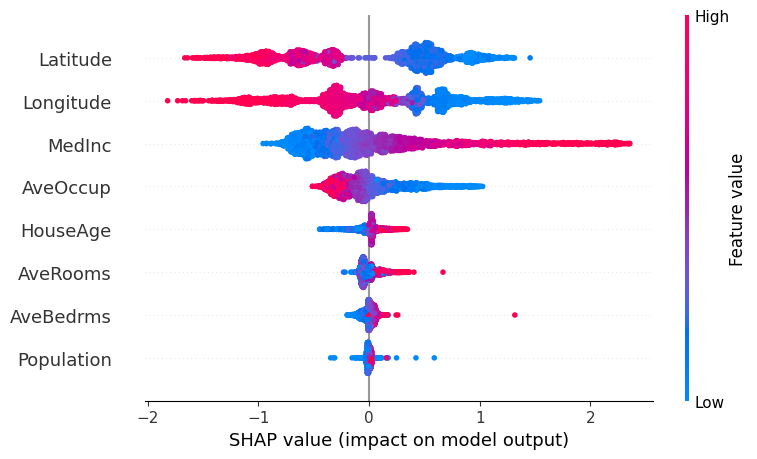

In [12]:
# Feature Importance Plot
shap.summary_plot(shap_values, X_test)

## **8️⃣ Initialize JavaScript for SHAP Visualizations and SHAP Force Plot for a Single Prediction**

In [15]:
# Initialize JS for SHAP
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0])

## **9️⃣  SHAP Decision Plot for a Single Prediction**

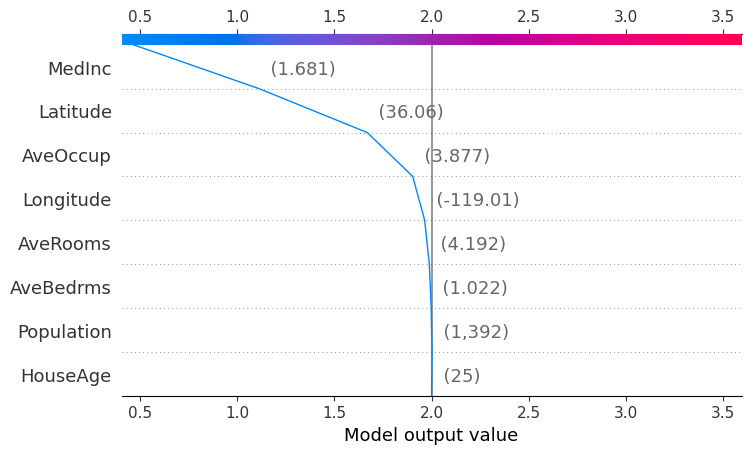

In [16]:
# Decision Plot for a Single Prediction
shap.decision_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0])